In [1]:
from utils import *
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import random
import warnings
warnings.filterwarnings('ignore')

In [2]:
%store -r data
%store -r target

In [3]:
data = standardize(data)
X_dev, y_dev, X_test, y_test, X_train, y_train, X_val, y_val = split(data,target)

X_train shape: (810, 54)
X_test shape: (100, 54)
X_val shape: (90, 54)
y_train shape: (810,)
y_test shape: (100,)
y_val shape: (90,)


### Original Model
Building a model with no parameter tuning and using the raw csv file

In [4]:
model_svm = SVC()
model_svm.fit(X_dev, y_dev)
predsDevsvm = model_svm.predict(X_dev)
predsTestsvm = model_svm.predict(X_test)

In [5]:
testsvm_score =  accuracy_score(y_test, predsTestsvm)
devsvm_score = accuracy_score(y_dev, predsDevsvm)

In [6]:
print("Classification Score for SVM Classifier on Dev dataset:\n")
print("Dev Score : ", devsvm_score)
print(classification_report(y_dev, predsDevsvm))
print("--------------------------------------------------------")
print("Classification Score for SVM Classifier on Test dataset:\n")
print("Test Score :", testsvm_score)
print(classification_report(y_test, predsTestsvm))

Classification Score for SVM Classifier on Dev dataset:

Dev Score :  0.78
              precision    recall  f1-score   support

       blues       0.77      0.78      0.77        92
   classical       0.96      0.98      0.97        92
     country       0.77      0.75      0.76        92
       disco       0.61      0.77      0.68        92
      hiphop       0.85      0.67      0.75        93
        jazz       0.88      0.86      0.87        83
       metal       0.79      0.91      0.85        92
         pop       0.88      0.85      0.86        92
      reggae       0.72      0.73      0.72        86
        rock       0.61      0.49      0.54        86

    accuracy                           0.78       900
   macro avg       0.78      0.78      0.78       900
weighted avg       0.78      0.78      0.78       900

--------------------------------------------------------
Classification Score for SVM Classifier on Test dataset:

Test Score : 0.75
              precision    recall

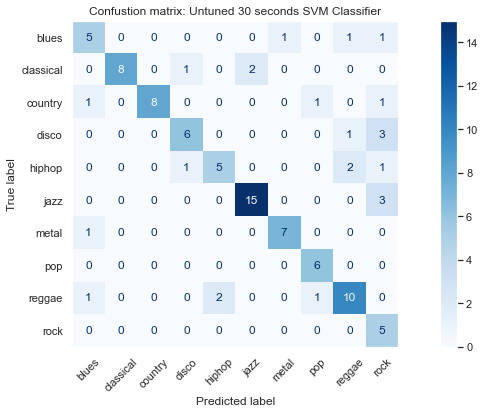

Accuracy : 0.75
Macro F-1 Score : 0.74


In [7]:
# Evaluate Model on Test set
class_labels = list(model_svm.classes_)
macro_f1, accuracy = evaluate_model(predsTestsvm, y_test, class_labels,
                                    'Confustion matrix: Untuned 30 seconds SVM Classifier')
print('Accuracy : %.2f'%accuracy)
print('Macro F-1 Score : %.2f'%macro_f1)

### Tuned Model
Building a model with hyperparameters tuning using 5-fold cross validation with GridSearchCV and the raw csv file

In [10]:
parameters = {"kernel": ['linear', 'rbf', 'sigmoid'],
            'C': np.linspace(1, 100, num=20),
            "gamma": np.linspace(0.0001,1, num=20)}
print(parameters)

{'kernel': ['linear', 'rbf', 'sigmoid'], 'C': array([  1.        ,   6.21052632,  11.42105263,  16.63157895,
        21.84210526,  27.05263158,  32.26315789,  37.47368421,
        42.68421053,  47.89473684,  53.10526316,  58.31578947,
        63.52631579,  68.73684211,  73.94736842,  79.15789474,
        84.36842105,  89.57894737,  94.78947368, 100.        ]), 'gamma': array([1.00000000e-04, 5.27263158e-02, 1.05352632e-01, 1.57978947e-01,
       2.10605263e-01, 2.63231579e-01, 3.15857895e-01, 3.68484211e-01,
       4.21110526e-01, 4.73736842e-01, 5.26363158e-01, 5.78989474e-01,
       6.31615789e-01, 6.84242105e-01, 7.36868421e-01, 7.89494737e-01,
       8.42121053e-01, 8.94747368e-01, 9.47373684e-01, 1.00000000e+00])}


In [11]:
tune_svm = GridSearchCV(estimator = model_svm, param_grid = parameters, cv = 5)
tune_svm.fit(X_dev, y_dev)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([  1.        ,   6.21052632,  11.42105263,  16.63157895,
        21.84210526,  27.05263158,  32.26315789,  37.47368421,
        42.68421053,  47.89473684,  53.10526316,  58.31578947,
        63.52631579,  68.73684211,  73.94736842,  79.15789474,
        84.36842105,  89.57894737,  94.78947368, 100.        ]),
                         'gamma': array([1.00000000e-04, 5.27263158e-02, 1.05352632e-01, 1.57978947e-01,
       2.10605263e-01, 2.63231579e-01, 3.15857895e-01, 3.68484211e-01,
       4.21110526e-01, 4.73736842e-01, 5.26363158e-01, 5.78989474e-01,
       6.31615789e-01, 6.84242105e-01, 7.36868421e-01, 7.89494737e-01,
       8.42121053e-01, 8.94747368e-01, 9.47373684e-01, 1.00000000e+00]),
                         'kernel': ['linear', 'rbf', 'sigmoid']})

In [12]:
print("Best Score :", tune_svm.best_score_)
print("Best Parameters :",tune_svm.best_params_)

Best Score : 0.7577777777777778
Best Parameters : {'C': 16.63157894736842, 'gamma': 0.2632315789473684, 'kernel': 'rbf'}


In [13]:
predsDevsvm_tuned = tune_svm.predict(X_dev)
predsTestsvm_tuned = tune_svm.predict(X_test)

print("Score on Dev data for svm using GridSearchCV:", accuracy_score(y_dev, predsDevsvm_tuned))
print("Score on Test data for svm using GridSearchCV:",accuracy_score(y_test, predsTestsvm_tuned))

Score on Dev data for svm using GridSearchCV: 0.9577777777777777
Score on Test data for svm using GridSearchCV: 0.86


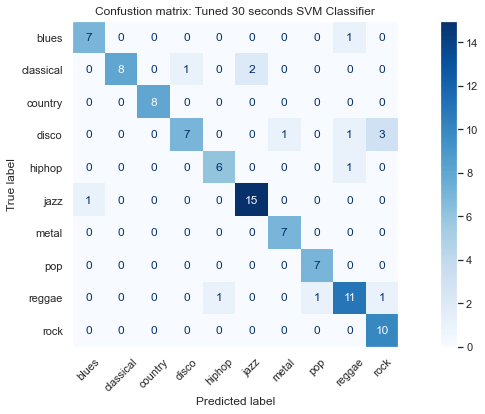

Accuracy : 0.86
Macro F-1 Score : 0.87


In [14]:
# Evaluate Model on Test set
class_labels = list(tune_svm.classes_)
macro_f1, accuracy = evaluate_model(predsTestsvm_tuned, y_test, class_labels,
                                    'Confustion matrix: Tuned 30 seconds SVM Classifier')
print('Accuracy : %.2f'%accuracy)
print('Macro F-1 Score : %.2f'%macro_f1)

### Dimensionality reduction of data using PCA

In [15]:
# Principal Component Analysis 
### cite : https://machinelearningmastery.com/calculate-principal-component-analysis-scratch-python/

# create the PCA instance
pca = PCA(n_components=30)
# fit on data
pca_data = pca.fit_transform(X_dev)
pca_data_test = pca.transform(X_test)
# pca_data_dev = pca.transform(X_dev)
PCA_df= pd.DataFrame(data=pca_data)
y_dev.index = PCA_df.index
pca_final=pd.concat([PCA_df,y_dev], axis = 1)
# access values
print("Explained Variance of each component:",pca.explained_variance_)
print("Sum of Explained Variance:", sum(pca.explained_variance_ratio_))

Explained Variance of each component: [0.27462107 0.16378828 0.106374   0.0723295  0.05484226 0.0387792
 0.02690359 0.02395643 0.02175637 0.01846612 0.01427943 0.01395746
 0.0120279  0.01112264 0.01017839 0.00968102 0.00884283 0.0079685
 0.00769754 0.007245   0.00710445 0.00655218 0.00600141 0.00568854
 0.00541402 0.00495755 0.00484603 0.00469093 0.004507   0.00421453]
Sum of Explained Variance: 0.9526458310752437


In [16]:
pca_final.head()

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,label
0,0.000578,-0.630373,-0.054837,0.410234,0.009388,0.027373,-0.032693,-0.147326,0.031383,0.111813,...,0.076107,0.102082,-0.078832,0.038323,-0.006713,-0.022578,0.123085,-0.058879,0.038600,classical
1,0.071451,-0.402465,-0.106785,0.332658,-0.060422,0.226590,0.122803,-0.066841,0.069256,-0.088956,...,0.119481,0.093027,-0.017418,0.095241,0.005126,-0.108607,-0.027353,0.007145,0.002517,jazz
2,-0.047268,0.326820,-0.598692,0.227380,0.045610,0.264122,-0.077907,0.063581,-0.168400,0.038899,...,-0.087909,0.044611,-0.057588,-0.029843,0.012643,0.089040,-0.022239,-0.158868,-0.052412,country
3,-0.437642,0.235405,-0.003960,0.029110,-0.170677,-0.094825,-0.142894,0.105728,0.099773,-0.181432,...,0.021653,-0.012902,0.027040,0.053595,0.133768,0.101916,0.086739,-0.040463,0.065140,metal
4,-0.849344,0.103658,-0.048105,-0.018132,-0.023246,-0.159358,0.035768,-0.071900,0.111847,0.102866,...,0.040624,-0.010041,0.015598,-0.030144,0.035937,0.010211,-0.041643,0.012160,0.026320,disco


### PCA - Original Model
Building a model with no parameter tuning and using the PCA data

In [17]:
model_pca = model_svm
model_pca.fit(pca_final.iloc[:,:30],pca_final.iloc[:,30])
pcaTrainsvm = model_pca.predict(pca_data)
pcaTestsvm = model_pca.predict(pca_data_test)

In [18]:
pcatestsvm_score =  accuracy_score(y_test, pcaTestsvm)
pcasvm_score = accuracy_score(y_dev, pcaTrainsvm)

In [19]:
print("Classification Score for SVM Classifier on Train dataset:\n")
print("Train Score : ", pcasvm_score)
print("--------------------------------------------------------")
print("Classification Score for SVM Classifier on Test dataset:\n")
print("Test Score :", pcatestsvm_score)

Classification Score for SVM Classifier on Train dataset:

Train Score :  0.8666666666666667
--------------------------------------------------------
Classification Score for SVM Classifier on Test dataset:

Test Score : 0.81


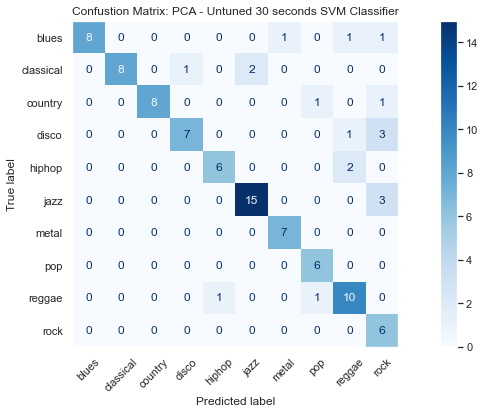

Accuracy : 0.81
Macro F-1 Score : 0.81


In [20]:
# Evaluate Model
class_labels = list(model_svm.classes_)
macro_f1, accuracy = evaluate_model(pcaTestsvm, y_test, class_labels,
                                    'Confustion Matrix: PCA - Untuned 30 seconds SVM Classifier')
print('Accuracy : %.2f'%accuracy)
print('Macro F-1 Score : %.2f'%macro_f1)

### PCA - Tuned Model
Building a model with hyperparameters tuning using 5-fold cross validation with GridSearchCV and the PCA data

In [21]:
pca_final.iloc[:,:30]

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000578,-0.630373,-0.054837,0.410234,0.009388,0.027373,-0.032693,-0.147326,0.031383,0.111813,...,-0.184637,0.076107,0.102082,-0.078832,0.038323,-0.006713,-0.022578,0.123085,-0.058879,0.038600
1,0.071451,-0.402465,-0.106785,0.332658,-0.060422,0.226590,0.122803,-0.066841,0.069256,-0.088956,...,0.119743,0.119481,0.093027,-0.017418,0.095241,0.005126,-0.108607,-0.027353,0.007145,0.002517
2,-0.047268,0.326820,-0.598692,0.227380,0.045610,0.264122,-0.077907,0.063581,-0.168400,0.038899,...,-0.009402,-0.087909,0.044611,-0.057588,-0.029843,0.012643,0.089040,-0.022239,-0.158868,-0.052412
3,-0.437642,0.235405,-0.003960,0.029110,-0.170677,-0.094825,-0.142894,0.105728,0.099773,-0.181432,...,-0.128705,0.021653,-0.012902,0.027040,0.053595,0.133768,0.101916,0.086739,-0.040463,0.065140
4,-0.849344,0.103658,-0.048105,-0.018132,-0.023246,-0.159358,0.035768,-0.071900,0.111847,0.102866,...,-0.058802,0.040624,-0.010041,0.015598,-0.030144,0.035937,0.010211,-0.041643,0.012160,0.026320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,-0.654431,0.218151,0.332880,0.090825,0.133881,-0.215551,0.054110,0.024758,0.233047,-0.024788,...,0.274097,-0.019797,0.088583,-0.033103,-0.048677,-0.004444,-0.084542,-0.005162,-0.001269,0.012920
896,0.515280,-0.634698,0.082394,0.485203,-0.101831,-0.139827,-0.145430,0.177584,0.022342,0.179423,...,0.032974,-0.015832,-0.009109,-0.115027,-0.060952,-0.184946,-0.011424,0.002013,0.059760,-0.042515
897,0.976786,0.902560,0.595924,0.289104,0.483065,0.202642,0.115374,0.003244,-0.108631,-0.320621,...,0.043868,0.007134,-0.011738,-0.013187,-0.033479,-0.127312,-0.037240,0.001567,-0.071996,0.049267
898,0.124804,0.297352,-0.452053,-0.032074,0.037626,0.157139,-0.016187,-0.012218,-0.084182,0.132896,...,0.117674,-0.044554,0.003703,0.032574,0.039656,-0.128110,0.084786,0.038715,-0.038887,-0.079641


In [22]:
model_pca_tuned = tune_svm
model_pca_tuned.fit(pca_final.iloc[:,:30],pca_final.iloc[:,30])
pcaTrainsvm_tuned = model_pca_tuned.predict(pca_data)
pcaTestsvm_tuned = model_pca_tuned.predict(pca_data_test)

In [24]:
pcatestsvm_score =  accuracy_score(y_test, pcaTestsvm_tuned)
pcasvm_score = accuracy_score(y_dev, pcaTrainsvm_tuned)

In [25]:
print("Classification Score for SVM Classifier on Train dataset:\n")
print("Train Score : ", pcasvm_score)
print("--------------------------------------------------------")
print("Classification Score for SVM Classifier on Test dataset:\n")
print("Test Score :", pcatestsvm_score)

Classification Score for SVM Classifier on Train dataset:

Train Score :  0.9688888888888889
--------------------------------------------------------
Classification Score for SVM Classifier on Test dataset:

Test Score : 0.8


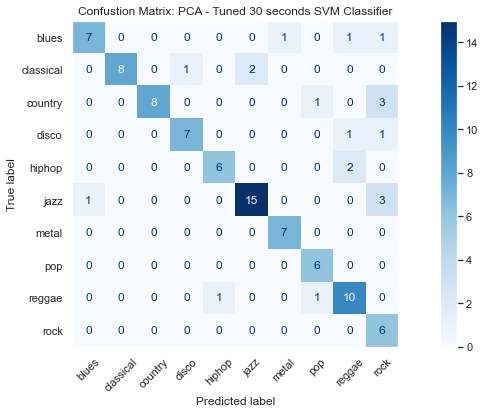

Accuracy : 0.80
Macro F-1 Score : 0.80


In [26]:
# Evaluate Model
class_labels = list(model_svm.classes_)
macro_f1, accuracy = evaluate_model(pcaTestsvm_tuned, y_test, class_labels,
                                    'Confustion Matrix: PCA - Tuned 30 seconds SVM Classifier')
print('Accuracy : %.2f'%accuracy)
print('Macro F-1 Score : %.2f'%macro_f1)